<a href="https://colab.research.google.com/github/Tishya31/Handwritten-Digit-Recognition-MNIST-/blob/main/Handwriting_digit(minst).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
model = models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')  # 10 digits (0-9)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8958 - loss: 0.3348 - val_accuracy: 0.9813 - val_loss: 0.0600
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9855 - loss: 0.0468 - val_accuracy: 0.9869 - val_loss: 0.0460
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9896 - loss: 0.0323 - val_accuracy: 0.9886 - val_loss: 0.0357
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.9824 - val_loss: 0.0573
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9936 - loss: 0.0204 - val_accuracy: 0.9907 - val_loss: 0.0298


313/313 - 2s - 7ms/step - accuracy: 0.9907 - loss: 0.0298

✅ Test Accuracy: 0.9907


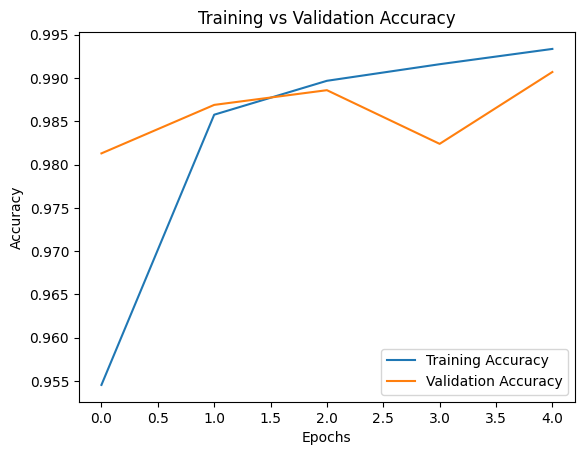

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Training vs Validation Accuracy")
plt.show()

In [10]:
import numpy as np
sample = x_test[0].reshape(1,28,28,1)
prediction = np.argmax(model.predict(sample))
print(f"\n🔍 Predicted digit: {prediction}, Actual digit: {y_test[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

🔍 Predicted digit: 7, Actual digit: 7
